# **Executive Summary**

## This notebook is intended to :

- Provide a comprehensive step-by-step Exploratory Data Analysis (EDA) for the data in Forbes AI 50 lists for 2022 and 2023.
- Collect and discuss the insights, whether straightforward or hidden, as figured out during such an EDA.

## Key Insgiths :

- Data Science and AI Infrastructure stayed in focus of Forbse experts in both 2022 and 2023.
- Cybersecurity industry got much more traction in 2023 vs. 2022.
- In turn, Transpportation and Logistics, Environment and Energy, Customer Service, and Sales and Marketing got decline in terms of the number of the companies listed in 2023 vs. 2022.
- As of 2023, the listed companies from Data Science, Cybersecurity, AI Infrastructure, and Pharmaceutical industries raised the most capital
The analysis of companies that got recent investments in 2022-early 2023 also demonstrates cases of increased capital raising in Data Science, Cybersecurity, and AI Infrastructure industries.
- Generative AI contributors that build the infrastructure for it got significant funding; in turn, the companies that innovate with leveraging Generative AI technologies to the industrial solutions are funded on the far less scale, as of 2023.


# **Reading and Processing Data**

I will start by characterizing the data relatively to the number of observations, number and types of features, overall missing rate, and percentage of duplicate observations. We will do it separately for the data for 2022 and 2023, respectively.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [ ]:
def funding_to_numeric(financial_string):
    res = 0
    x = financial_string.replace('$', '')
    tokens = x.split(' ')
    num_val = float(tokens[0])
    multiplier = 0
    if tokens[1] == 'M':
        multiplier = 1000000
    else:
        multiplier = 1000000000
    res = int(num_val * multiplier)
    return res

def is_generative_ai(mission):
    res = 'No'

    generative_ai_technologies = [
        'Chatbot application',
        'Video and podcast editing',
        'Open-source AI library',
        'Photo editing',
        'Copyrighting software',
        'AI image generator',
        'AI model training tools',
        'AI model developer',
        'Voice chatbots',
        'Image and video editing',
        'Synthetic video creation',
        'Presentation creation software',
        'Personalized search engine',
    ]

    if mission in generative_ai_technologies:
        res = 'Yes'

    return res

def fix_industry_2022_typos(industry):
    res = industry
    if res == 'Pharmacutical':
        res = 'Pharmaceutical'
    return res

def set_industry(mission_2023):
    res = 'N/A'

    media_entertainment = [
        'Video and podcast editing',
        'Photo editing',
        'Personalized search engine',
        'Image and video editing',
        'Synthetic video creation',
        'Presentation creation software', ]

    consumer_tech = ['Voice analysis software']

    education = ['Space simulation software',]

    env_energy = ['Forestry satellite data analysis',]

    retail = ['Cashierless retail checkout',]

    customer_service = ['Chatbot application', 'Voice chatbots',]

    emp_support = ['Automated IT support', 'Digital assistant for lawyers',
                   'Legal contract management', 'Recruiting software',]

    agriculture = ['Weeding tractors for farming', ]

    cybersecurity_missions = ['Defense intelligence software',
                              'Defense software',
                              'Email cyberattack detection',
                              'Autonomous defense software',
                              'Cyberattack detection',
                             ]

    sales_marketing_missions = ['Market intelligence search',
                               'Sales software',
                               'Copyrighting software',
                               ]

    ds_missions = ['Data issue detection',
                   'Data storage and analytics', 'AI model developer', 'Data labeling software',
                  ]

    ai_infrastructure = ['AI model training tools',
                         'Open-source AI library',
                         'Developer tools for AI',
                         'Data labeling provider',
                         'Internal workplace search',
                         'AI image generator',
                         'Personalized search engine',
                        ]

    pharma = ['Clinical trial forecasting',
             'Drug discovery', 'Drug discovery and diagnostics',]

    healthcare = ['Disease detection',  'Patient risk detection',]

    construction = ['Construction robots']

    transportation = ['Autonomous trucking technology', ]

    if mission_2023 in cybersecurity_missions:
        res = 'Cybersecurity'
    elif mission_2023 in sales_marketing_missions:
        res = 'Sales and Marketing'
    elif mission_2023 in ds_missions:
        res = 'Data Science'
    elif mission_2023 in ai_infrastructure:
        res = 'AI Infrastructure'
    elif mission_2023 in pharma:
        res = 'Pharmaceutical'
    elif mission_2023 in healthcare:
        res = 'Healthcare'
    elif mission_2023 in construction:
        res = 'Construction'
    elif mission_2023 in transportation:
        res = 'Transportation and Logistics'
    elif mission_2023 in agriculture:
        res = 'Agriculture'
    elif mission_2023 in emp_support:
        res = 'Employee Support'
    elif mission_2023 in customer_service:
        res = 'Customer Service'
    elif mission_2023 in retail:
        res = 'Retail'
    elif mission_2023 in env_energy:
        res = 'Environment and Energy'
    elif mission_2023 in education:
        res = 'Education'
    elif mission_2023 in consumer_tech:
        res = 'Consumer Technology'
    elif mission_2023 in media_entertainment:
        res = 'Media and Entertainment'
    return res

In [ ]:
df_2022 = pd.read_csv('/content/AI50 2022.csv')
df_2023 = pd.read_csv('/content/AI50-2023.csv')

## **Forbes: Dataset AI50-2022**

In [ ]:
df_2022.head(5)


,NAME,INDUSTRY,FUNDING,HEADQUARTERS,CEO
0,6sense,Sales and Marketing,$426 M,"San Francisco, California",Jason Zintak
1,Abacus.AI,Data Science,$90 M,"San Francisco, California",Bindu Reddy
2,Abnormal Security,Cybersecurity,$74 M,"San Francisco, California",Evan Reiser
3,Amira Learning,Education,$21 M,"San Francisco, California",Mark Angel
4,AMP Robotics,Environment and Energy,$78 M,"Louisville, Colorado",Matanya Horowitz


In [ ]:
df_2022.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          50 non-null     object
 1   INDUSTRY      50 non-null     object
 2   FUNDING       50 non-null     object
 3   HEADQUARTERS  50 non-null     object
 4   CEO           50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


The description of the 2022 dataset is provided in the table below:

*the* dataset contains 5 features (columns), and there is no any missing values in it.




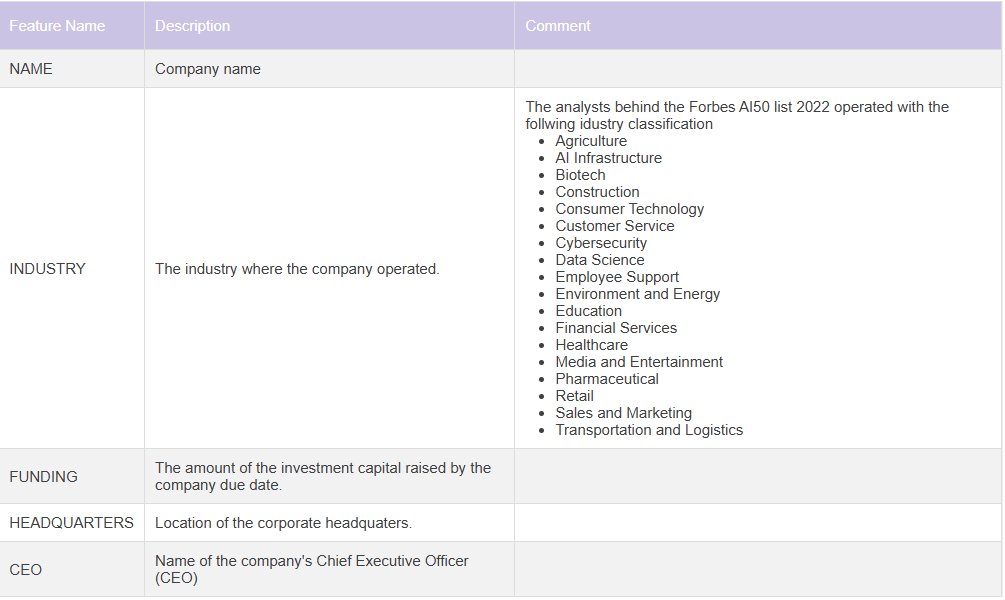

## **Forbes: Dataset AI50-2023**

In [ ]:
df_2023.head(5)


,NAME,MISSION,FUNDING,HEADQUARTERS,CEO,YEAR_FOUNDED,EMPLOYEES
0,Abnormal Security,Email cyberattack detection,$284 M,"San Francisco, California, USA",Evan Reiser,2018,500
1,Adept,AI model developer,$415 M,"San Francisco, California, USA",David Luan,2022,25
2,AlphaSense,Market intelligence search,$520 M,"New York, New York, USA",Jack Kokko,2011,1112
3,Anduril Industries,Defense software,$2.4 B,"Costa Mesa, California, USA",Brian Shimpf,2017,1600
4,Anthropic,AI model developer,$1.3 B,"San Francisco, California, USA",Dario Amodei,2021,150


In [ ]:
df_2023.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          50 non-null     object
 1   MISSION       50 non-null     object
 2   FUNDING       50 non-null     object
 3   HEADQUARTERS  50 non-null     object
 4   CEO           50 non-null     object
 5   YEAR_FOUNDED  50 non-null     int64 
 6   EMPLOYEES     50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


The description of the features in the 2023 list is provided in the table below:

As we can see, the dataset contains 7 features (columns), and there is no any missing values in it.

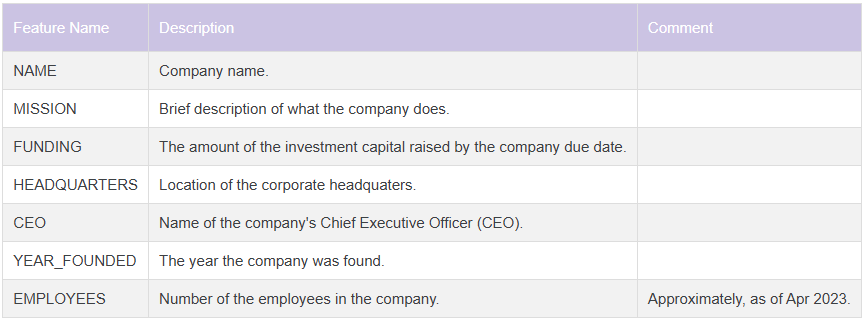



1) We can also see the large fraction of 2023 features is not present in the dataset for 2022 while INDUSTRY feature is not provided in the dataset for 2023.

2) Such findings make the following implications to our analytical activitties down the road:
 - INDUSTRY feature should be recoved in 2023 dataset, based on the values in MISSION field (see Feature Engineering section below).
 - Certain analytics will be only feasible for 2023 data.

# **Feature Engineering**

Before we proceed with the analytics and mining the insights from the datasets, we will apply the following transformations:

 - convert 'FUNDING' column to the numeric type as it is a monetary data by its nature (in both the datasets for 2022 and 2023).
 - introduce INDUSTRY' feature in the AI 50 dataset for 2023 based on the company mission/description, to be able to compare and match the data between 2022 and 2023 for the trend analysis.
 - introduce GENERATIVE_AI cat feature ('Yes'/'No') in the AI 50 dataset for 2023 to indicate if a particular company contributes to the development of Generative AI technologies.

At the end of the feature engineering step, we are going to review the dataset to see the new features there.



In [ ]:
df_2023['INDUSTRY'] = df_2023['MISSION'].apply(lambda x: set_industry(x))
df_2023['GENERATIVE_AI'] = df_2023['MISSION'].apply(lambda x: is_generative_ai(x))
df_2023['FUNDING'] = df_2023['FUNDING'].apply(lambda x: funding_to_numeric(x))
df_2022['FUNDING '] = df_2022['FUNDING '].apply(lambda x: funding_to_numeric(x))
df_2022.rename(columns = {'FUNDING ':'FUNDING'}, inplace = True)
df_2023.head()

,NAME,MISSION,FUNDING,HEADQUARTERS,CEO,YEAR_FOUNDED,EMPLOYEES,INDUSTRY,GENERATIVE_AI
0,Abnormal Security,Email cyberattack detection,284000000,"San Francisco, California, USA",Evan Reiser,2018,500,Cybersecurity,No
1,Adept,AI model developer,415000000,"San Francisco, California, USA",David Luan,2022,25,Data Science,Yes
2,AlphaSense,Market intelligence search,520000000,"New York, New York, USA",Jack Kokko,2011,1112,Sales and Marketing,No
3,Anduril Industries,Defense software,2400000000,"Costa Mesa, California, USA",Brian Shimpf,2017,1600,Cybersecurity,No
4,Anthropic,AI model developer,1300000000,"San Francisco, California, USA",Dario Amodei,2021,150,Data Science,Yes


# **AI50 2023 Insights**

First of all, we should indicate the companies from 5 countries are represtented in AI50 2023 list:

- USA
- Canada
- UK
- Israel
- Japan

Let's look at contribution of the companies from Forbse AI50 2023 List to the progress of Generative AI technologies

In [ ]:
dfg = df_2023['GENERATIVE_AI'].value_counts().reset_index()
dfg.columns = ['GENERATIVE_AI', 'Quantity']
fig = px.bar(dfg, x='GENERATIVE_AI', y='Quantity', title='Number of companies contributing to Generative AI' )
fig.show()

We see that 26% of the companies represennted in Forbes AI50 2023 List are involved in building Generative AI technologies. It provides yet one more confirmation to the growing interest in Generative AI across the industry.



In [ ]:
dfg = df_2023['INDUSTRY'].value_counts().reset_index()
dfg.columns = ['INDUSTRY', 'Quantity']
fig = px.bar(dfg, x='INDUSTRY', y='Quantity', title='Number of Companies by Industry - 2023' )
fig.show()

We can see that Data Science and AI Infrastructure are the top industries by the number of companies included to the List. Three more industries are quite close to the leaders:

- Cybersecurity
- Sales and Marketing
- Media and Entertainment

Now let's look at distribution of the companies from Forbse AI50 2023 List by the industries and contribution to Generative AI

In [ ]:
agg_data = df_2023[["INDUSTRY", "GENERATIVE_AI"]].groupby(["INDUSTRY", "GENERATIVE_AI"]).size().reset_index(name="Count")

In [ ]:
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["GENERATIVE_AI", "INDUSTRY"],
    title="Distribution of Companies by Industry and Contribution to Generative AI",
    color="GENERATIVE_AI",
    height=800,
)
# display the figure
fig.show()

Although Generative AI started to be a mainstream trend after the recent launch of ChatGPT, Bing Chat Assistant and other Open AI-backed technologies with the power of LLM models in Mar-Apr 2023, we can see some industry convervatism/latency in terms of nominating the inventors of Generative AI technologies in the list:

- The number of companies from AI50 2023 list involved in Generative AI technology building is less then the companies involved in other types of AI tech (18 vs. 32)
- The biggest number of companies involved in Generative AI contribute to Data Science, Media and Entertainment, and AI Infrastructure industries
- The biggest number of the companies not involved in Generative AI contribute to Cybersecurity, Data Science, and Employee Support industries

## **Funding Insights (2023)**

In [ ]:
fig = px.box(df_2023, y="FUNDING", x="INDUSTRY",
             title="Funding of Companies by Industry (2023)",
             color="GENERATIVE_AI", # points="all",
          hover_data=df_2023.columns)

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=600,
    autosize=False,
    margin=dict(t=25, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

We can see that:

- Data Science, Cybersecurity, AI Infrastructure, and Pharmaceutical industries contain the companies with the most tangible investments, within AI50 2023 list.
- There are certain funding 'outliers', with several companies demonstrated 'outstanding' investments in their business (these are famous OpenAI and Databricks as well as Anduril Industries involved in Cybersecurity industry)
- If OpenAI excluded, the investments to Generative AI companies generally are less for the companies operated in other AI domains

# **AI50 2022 Insights**

- First of all, we should indicate the companies from USA only are represtented in AI50 2022 list.

- Let's look at contribution of the companies from Forbse AI50 2022 List to different industries.



In [ ]:
dfg = df_2022['INDUSTRY'].value_counts().reset_index()
dfg.columns = ['INDUSTRY', 'Quantity']
fig = px.bar(dfg, x='INDUSTRY', y='Quantity', title='Number of Companies by Industry - 2022' )
fig.show()

We find that:

- The most of the companies in the list operate in Data Science and AI Infrastructure.
-Smalller yet still significan presence of the companies from Forbse AI50 2022 List is in Healthcare, Pharmaceutical, and Customer Service industries

In [ ]:
fig = px.box(df_2022, y="FUNDING", x="INDUSTRY",
             title="Funding of Companies by Industry (2022)",
             # points="all",
          hover_data=df_2022.columns)

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=600,
    autosize=False,
    margin=dict(t=25, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

We can see that:

- The most fundings within the listed in AI50 2022 List received the companies that operate in Data Science, AI Infrastructure, Transpportation and Logistics, Environment and Energy, Customer Service, and Sales and Marketing industries.

- There are certain companies that are 'outliers' in terms of the extraodinary fundings recieved (compared to other companies in their industries listed in AI50 2022 list); these are Databricks, Scale AI, and Komodo Health

# **AI 50 Industry Focus Changes in 2022-2023**

Let's look at how the focus of experts collated AI50 Lists in 2022 and 2023 shifted in terms of industries where AI applications are used. We will consider the number of companies from a certain vertical listed in AI50 to be a measure of relative importance of AI progress in certain industries.

In [ ]:
dfg2023 = df_2023['INDUSTRY'].value_counts().reset_index()
dfg2023.columns = ['INDUSTRY', 'COMPANY_COUNT_2023']

dfg2023[['COMPANY_COUNT_2023']] = dfg2023[['COMPANY_COUNT_2023']].applymap(np.int64)

dfg2022 = df_2022['INDUSTRY'].value_counts().reset_index()
dfg2022.columns = ['INDUSTRY', 'COMPANY_COUNT_2022']

outer_merged = pd.merge(
     dfg2023, dfg2022, how="outer", on=["INDUSTRY"]
)

outer_merged['COMPANY_COUNT_2023'] = outer_merged['COMPANY_COUNT_2023'].fillna(0)
outer_merged[['COMPANY_COUNT_2023']] = outer_merged[['COMPANY_COUNT_2023']].applymap(np.int64)

<ipython-input-16-04077319ea54>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-04077319ea54>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
fig = go.Figure()

fig.add_bar(x=outer_merged['INDUSTRY'],y=outer_merged['COMPANY_COUNT_2022'], hovertext="2022", name="2022", marker_color="orange")
fig.add_bar(x=outer_merged['INDUSTRY'],y=outer_merged['COMPANY_COUNT_2023'], hovertext="2023", name="2023", marker_color="green")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=30, b=0, l=5, r=5),
    template="plotly_white",
    yaxis_title="Number of Companies",
    title=dict(text='AI50 Industry Focus Changes in 2022-2023', font=dict(size=20), yref='paper')
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

We find that:

- Data Science and AI Infrastructure industries remain the top priorities with AI innovations (and the VC capital invested into the respective companies from such industries); moreover, Data Science industry got more companies listed in AI50 in 2023 vs. 2022.

- Cybersecurity, Sales and Marketing, Media and Entertainment, and Employment Suppport industries got wider representation in AI50 2023 vs. 2022
Pharmaceutial, Healthcare, and Customer Service industries got less companies listed in 2023 vs. 2022.

- Biotech and Financial Services totally disappeared from the AI50 list in 2023

# **Funding Changes in Individual companies in 2022-2023**

We can see 10 companies from Forbse AI50 2022 list to participate in 2023 list as well. We are going to see how their funding was changed in between the time of filing both lists.

In [ ]:
df_2023_subset = df_2023[['NAME', 'INDUSTRY', 'FUNDING']]
df_2022_subset = df_2022[['NAME', 'FUNDING']]
df_2023_subset.rename(columns = {'FUNDING':'FUNDING_AS_OF_APR_2023'}, inplace = True)
df_2022_subset.rename(columns = {'FUNDING':'FUNDING_AS_OF_APR_2022'}, inplace = True)

# calculate the fundings changes during the last year
df = df_2023_subset.merge(df_2022_subset, on='NAME')
df['FUNDING_CHANGES'] = df['FUNDING_AS_OF_APR_2023'] - df['FUNDING_AS_OF_APR_2022']
df

<ipython-input-18-5d1e9879a953>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-5d1e9879a953>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,INDUSTRY,FUNDING_AS_OF_APR_2023,FUNDING_AS_OF_APR_2022,FUNDING_CHANGES
0,Abnormal Security,Cybersecurity,284000000,74000000,210000000
1,Arize AI,Data Science,62000000,23000000,39000000
2,Canvas,Construction,43000000,83000000,-40000000
3,Cohere,Data Science,175000000,165000000,10000000
4,Databricks,Data Science,3500000000,3600000000,-100000000
5,Glean,AI Infrastructure,155000000,55000000,100000000
6,Hugging Face,AI Infrastructure,160000000,160000000,0
7,Moveworks,Employee Support,315000000,315000000,0
8,Scale AI,AI Infrastructure,602000000,602000000,0
9,Waabi,Transportation and Logistics,84000000,83000000,1000000


We can see that:

- There are ten companies that represented in both AI50 2022 and 2023 lists, and therefore we can see if they raised funds recently (between Apr 2022 and Apr 2023).
- The most remarkable recent capital raise happened to Abnoral Security (Cybersecurity) that raised USD 210 M recently.
- The most of other companies that raised the additional capital recently are involved in Data Science and AI Infrastructure industries.
- Waabi from Transportation and Logistics recently raised USD 1 M (the smallest amount within the listed companies).
- Some of the companies faced the capital restructuring that indicated by decrease in the corporate capital between 2022 and 2023.

# **Industry Trends: 2022 vs. 2023**

- If we compare the findings for 2022 and 2023 lists in perspective, we can draw the insights below

- Data Science and AI Infrastructure stayed in focus of Forbes experts in both 2022 and 2023.

- Cybersecurity industry got much more traction in 2023 vs. 2022.

- In turn, Transpportation and Logistics, Environment and Energy, Customer Service, and Sales and Marketing got decline in terms of the number of the companies listed in 2023 vs. 2022.

- As of 2023, the listed companies from Data Science, Cybersecurity, AI Infrastructure, and Pharmaceutical industries raised the most capital
The analysis of companies that got recent investments in 2022-early 2023 also demonstrates cases of increased capital raising in Data Science, Cybersecurity, and AI Infrastructure industries.

- Generative AI contributors that build the infrastructure for it got significant funding; in turn, the companies that innovate with leveraging Generative AI technologies to the industrial solutions are funded on the far less scale.